In [ ]:
import starsim as ss
import tbsim as mtb
import numpy as np
import pandas as pd
import sciris as sc
import tbsim.config as cfg
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import os

# run act3 here
%run run_act3.py







  Running 2016-08-23 (190/209) (4.14 s)  ••••••••••••••••••—— 91%


  Running 2015-02-10 (110/209) (5.59 s)  ••••••••••—————————— 53%

  Running 2014-07-15 (80/209) (5.34 s)  •••••••————————————— 39%%

  Running 2016-06-14 (180/209) (5.90 s)  •••••••••••••••••——— 87%
  Running 2016-11-01 (200/209) (6.08 s)  •••••••••••••••••••— 96%
  Running 2015-04-21 (120/209) (5.63 s)  •••••••••••————————— 58%


  Running 2015-09-08 (140/209) (5.70 s)  •••••••••••••——————— 67%
  Running 2013-03-12 (10/209) (4.95 s)  •——————————————————— 5%%

  Running 2016-08-23 (190/209) (5.94 s)  ••••••••••••••••••—— 91%
  Running 2015-06-30 (130/209) (5.66 s)  ••••••••••••———————— 63%
  Running 2013-03-12 (10/209) (0.03 s)  •——————————————————— 5%
  Running 2013-03-12 (10/209) (0.04 s)  •——————————————————— 5%
  Running 2014-12-02 (100/209) (5.41 s)  •••••••••——————————— 48%


  Running 2016-11-01 (200/209) (5.97 s)  •••••••••••••••••••— 96%
  Running 2015-09-08 (140/209) (5.70 s)  •••••••••••••——————— 67%


In [ ]:
#os.getcwdb()

act3_results = pd.read_csv('../../results/ACT3/ACT3.csv', index_col=0)
tb_results = pd.read_csv('../../results/ACT3/TB.csv', index_col=0)

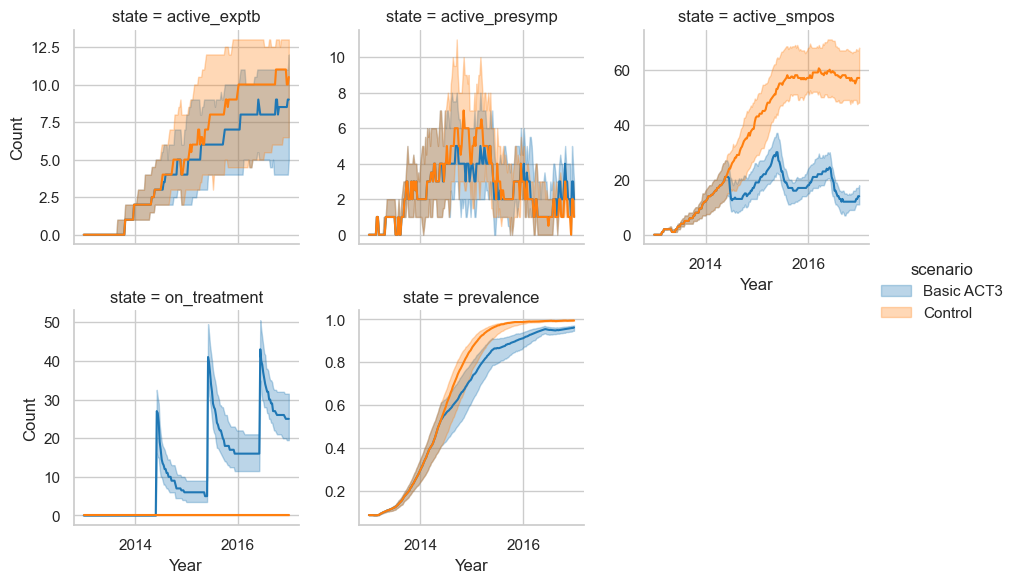

In [ ]:
tb_results_agg = (
      tb_results
        .drop(columns='time')
        .melt(id_vars=['time_year', 'scenario', 'rand_seed'], 
                  value_vars=['on_treatment', 'prevalence', 'active_presymp', 'active_smpos', 'active_exptb'], 
                  var_name='state',
                  value_name='count')
        .drop(columns='rand_seed')
        .groupby(['time_year', 'scenario', 'state'])
        .agg(
              median=('count', 'median'), 
              q11=('count', lambda x: np.percentile(x, 11)),
              q89=('count', lambda x: np.percentile(x, 89))
              )
        .reset_index()
        )

# plot the results
sns.set_context("notebook")
sns.set_style("whitegrid")
g = sns.FacetGrid(tb_results_agg, col="state", 
                          margin_titles=True, aspect=1, 
                          sharey=False, hue="scenario", palette="tab10", col_wrap=3)
g.map_dataframe(sns.lineplot, x="time_year", y="median")
g.map_dataframe(plt.fill_between, "time_year", "q11", "q89", alpha=0.3)

g.set_axis_labels("Year", "Count")
g.add_legend()

plt.show()

# g = sns.FacetGrid(tb_results_long, col="state", col_wrap=3, height=4, aspect=1.5, hue="rand_seed", palette="tab10")
# g.map(sns.lineplot, "time_year", "count")
# g.add_legend()

# plt.show()
